# Avaliar o desempenho do analisador


Mais tarde, irei construir um analisador de sentimento baseado em redes neurais, cujo desempenho será comparado ao desempenho do meu analisador de sentimento baseado em dicionário. Para ser capaz de fazer essa comparação, primeiro devo avaliar o desempenho do analisador de sentimento baseado em dicionário.

Especialistas em PNL frequentemente avaliam seus modelos quanto à acurácia, à precisão e à recall. Conhecer esses valores me fornecerá feedback sobre a precisão dos meus modelos e me dará pistas sobre quais partes do meu modelo precisam ser ajustadas.

Especialistas em PNL frequentemente avaliam seus classificadores desta forma - não apenas os analisadores de sentimento, mas qualquer tipo de classificador.

Especialistas em PNL gostam de ver seus resultados tanto em formato textual quanto em formato visual. Para a última representação, eles tendem a usar a matriz de confusão.

## Fluxo de Trabalho

- Categorizar reviews como positivas, negativas ou neutras com base nos scores
- Categorizar as classificações das análises como positivas, negativas ou neutras com base nos ratings.

- Avaliar o analisador de sentimento baseado em dicionário:
 - Acurácia;
  - Precisão;
  - Recall;

In [1]:
import pandas as pd

In [2]:
reviews = pd.read_csv('/content/drive/MyDrive/Data Science/Portfólio/small_corpus.csv')

## Categorizar reviews baseado nos scores

A lógica de categorização foi:

- Se o score de sentimento da análise for superior a 0.2, seu valor de sentimento é positivo.
- Se o score de sentimento da análise for menor ou igual a 0.2 e maior ou igual a -0.2, seu valor de sentimento é neutro.
- Se o score de sentimento da análise for inferior a -0.2, seu valor de sentimento é negativo.

In [15]:
reviews.head()

,rating,review,rev_score_v2,cat_score,cat_rating
0,1.0,Dog didn't care for it. I don't know what the ...,0.000000,neutral,negative
1,1.0,Most of the cans arrived damaged.\nUpdate: I ...,-0.019928,neutral,negative
2,1.0,I ordered an XL for my dog who is a mix out an...,0.011905,neutral,negative
3,1.0,"I put my cat on Evo for 2 years, she got a uri...",-0.014015,neutral,negative
4,1.0,My dog had the felt pulled off these things in...,-0.166667,neutral,negative


In [7]:
reviews['cat_score'] = reviews['rev_score_v2'].apply(lambda x: 'positive' if x > 0.2 else
                                                               'neutral' if x > -0.2 else'negative')
reviews.sample(10)

,rating,review,rev_score_v2,cat_score
2891,4.0,Probably better for larger-headed breeds (in t...,0.064771,neutral
168,1.0,The 2 pack I received were extremely accurate....,0.020833,neutral
931,1.0,"<div id=""video-block-R34B9I1XJLXL7D"" class=""a-...",0.000000,neutral
1847,2.0,I have a 20 lb mixed breed dog that looks a lo...,-0.072917,neutral
4463,5.0,puppy loves these.,0.333333,positive
526,1.0,Most of these were broken and not intact. Drag...,-0.062500,neutral
2862,4.0,Very easy to put together with simple instruct...,0.021991,neutral
281,1.0,They fall apart. Pieces had to be torn out of...,-0.444444,negative
1405,1.0,WOULDNT WASTE MY MONEY. Basically just plasti...,0.000000,neutral
948,1.0,"So I've ordered this kind before, and my dog w...",0.005678,neutral


## Categorizar reviews baseado nos ratings

A lógica da categorização foi:

- Se o rating for 5, seu valor de sentimento é positivo.
- Se o rating for 2, 3 ou 4, seu valor de sentimento é neutro.
- Se o rating for 1, seu valor de sentimento é negativo.

In [9]:
reviews['cat_rating'] = reviews['rating'].apply(lambda x: 'positive' if x == 5.0 else
                                                          'negative' if x == 1.0 else 'neutral')
reviews.sample(5)

,rating,review,rev_score_v2,cat_score,cat_rating
3301,5.0,Love it!! Table is easy to put up and very sturdy,0.361111,positive,positive
3749,5.0,This stuff is magic. Dont know how many puppie...,0.083333,neutral,positive
4186,5.0,My cat has very sensitive skin and a tummy tha...,0.000000,neutral,positive
3621,5.0,Great,1.000000,positive,positive
149,1.0,Would like to .reorder in xlg.,0.200000,neutral,negative


## Avaliação

In [10]:
# evaluation
from sklearn.metrics import accuracy_score

acc = accuracy_score(reviews['cat_rating'], reviews['cat_score'])
print(acc)

from sklearn.metrics import classification_report

#target_names = ["negative", "neutral", "positive"]
print(
    classification_report(reviews['cat_rating'], reviews['cat_score'])
)

0.40755555555555556
              precision    recall  f1-score   support

    negative       0.75      0.06      0.11      1500
     neutral       0.35      0.92      0.51      1500
    positive       0.77      0.24      0.37      1500

    accuracy                           0.41      4500
   macro avg       0.62      0.41      0.33      4500
weighted avg       0.62      0.41      0.33      4500



- Acurácia (Accuracy): A acurácia do modelo é de aproximadamente 0.41, o que significa que cerca de 41% das classificações feitas pelo modelo estão corretas. Isso é uma medida geral de desempenho do modelo.

- Precisão (Precision): A precisão mede a proporção de instâncias classificadas como positivas que realmente são positivas. Por exemplo, a precisão para a classe negative é 0.75, o que significa que 75% das instâncias classificadas como negative pelo modelo são realmente negative.

- Recall (Recall): O recall mede a proporção de instâncias positivas que foram corretamente identificadas pelo modelo. Por exemplo, o recall para a classe neutral é 0.92, o que significa que 92% das instâncias verdadeiramente neutral foram corretamente identificadas pelo modelo.

- F1-score: O F1-score é a média harmônica entre precisão e recall. É uma métrica útil quando há desequilíbrio entre as classes.

- Support: O suporte é o número de ocorrências reais de cada classe no conjunto de dados.

O relatório indica que o modelo tem uma precisão relativamente alta para as classes negative e positive, mas um recall baixo para a classe negative e um F1-score relativamente baixo para todas as classes. Isso sugere que o modelo pode estar tendo dificuldades em identificar corretamente instâncias da classe negative. É importante analisar mais detalhadamente as instâncias classificadas incorretamente para entender melhor onde o modelo está errando e como ele pode ser melhorado.

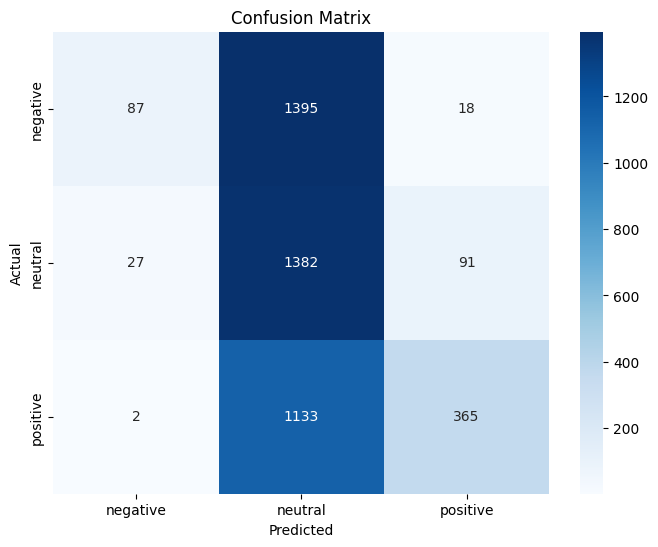

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(reviews['cat_rating'], reviews['cat_score'])

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["negative", "neutral", "positive"],
            yticklabels=["negative", "neutral", "positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()